In [1]:
test_uid = 'r39zjddbt'
test_sid = '4c116812-58e5-52fb-ac71-4cdf12bf6943'

In [7]:
%matplotlib inline

In [2]:
import datacube
dc = datacube.Datacube()

In [3]:
import dea_tools.spatial

/env/lib/python3.8/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  warnings.warn(


In [4]:
import dea_tools.waterbodies

In [5]:
wb = dea_tools.waterbodies.get_waterbody(test_uid)

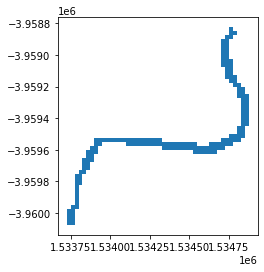

In [8]:
wb.plot()

In [36]:
ds = dc.load(
        'ga_ls_wo_3',
        time='2000-02-02',
        geopolygon=datacube.utils.geometry.Geometry(
            wb.envelope[0], crs=wb.crs),
        output_crs='EPSG:3577',
        resampling='nearest',
        resolution=(-30, 30),
        group_by='solar_day')

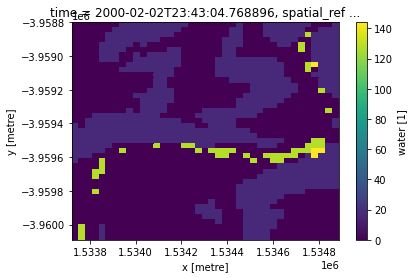

In [37]:
ds.water.plot()

In [38]:
yeah = dea_tools.spatial.xr_rasterize(wb, ds.water)

In [45]:
(ds.water.values[:, yeah.astype(bool)] == 128).sum()

41

In [46]:
yeah.sum()

<xarray.DataArray ()>
array(130, dtype=uint64)